In [2]:
from tqdm import tqdm_notebook
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt
import pickle5 as pickle
from glob import glob
from datetime import datetime
import re
import numpy as np
from matplotlib.colors import ListedColormap
from scipy.stats import mannwhitneyu


In [3]:
threshold={'hatespeech':0.9,'fearspeech':0.7,'normal':0.7}
dict_labels={'hatespeech':2,'fearspeech':1,'normal':0}
reverse_dict_labels={dict_labels[key]:key for key in dict_labels.keys()}

In [4]:
import re
import urllib.parse as urlparse
import emoji


GENERIC_TLDS = [
    'aero', 'asia', 'biz', 'com', 'coop', 'edu', 'gov', 'info', 'int', 'jobs', 
    'mil', 'mobi', 'museum', 'name', 'net', 'org', 'pro', 'tel', 'travel', 'cat'
    ]

def extract_emojis(line):
    return [c for c in line if c in emoji.UNICODE_EMOJI['en']]

def return_meta_info(element):
    dict_meta_info={}
    dict_meta_info['id']=element['id']
    dict_meta_info['reposts']=element['repost_count']
    dict_meta_info['replies']=element['reply_count']
    dict_meta_info['like_count']=element['like_count']
    return dict_meta_info


def get_domain(url):
    hostname = urlparse.urlparse(url.lower()).netloc
    if hostname == '':
        # Force the recognition as a full URL
        hostname = urlparse.urlparse('http://' + url).netloc

    # Remove the 'user:passw', 'www.' and ':port' parts
    hostname = hostname.split('@')[-1].split(':')[0].lstrip('www.').split('.')

    num_parts = len(hostname)
    if (num_parts < 3) or (len(hostname[-1]) > 2):
        return '.'.join(hostname[:-1])
    if len(hostname[-2]) > 2 and hostname[-2] not in GENERIC_TLDS:
        return '.'.join(hostname[:-1])
    if num_parts >= 3:
        return '.'.join(hostname[:-2])



def return_text_info(element):
    temp=element['post_body']
    all_emojis=extract_emojis(temp)
    #all_urls= re.findall('(?:(?:https?|ftp):\/\/)?[\w/\-?=%.]+\.[\w/\-&?=%.]+', temp)
    all_urls = re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', temp)
    all_hashtags=re.findall(r"#(\w+)", temp)
    
    dict_text_info={
        'num_hashtags':len(all_hashtags),
        'num_urls':len(all_urls),
        'num_emojis':len(all_emojis)
    }
    
    
    emoji_dict={}
    url_dict={}
    hashtag_dict={}
    
    for emoji in all_emojis:
        try:
            emoji_dict[emoji]+=1
        except KeyError:
            emoji_dict[emoji]=1
            
    for hashtag in all_hashtags:
        try:
            hashtag_dict[hashtag]+=1
        except KeyError:
            hashtag_dict[hashtag]=1
    for url in all_urls:
        try:
            url_dict[get_domain(url)]+=1
        except KeyError:
            url_dict[get_domain(url)]=1
        

    return dict_text_info,emoji_dict,url_dict,hashtag_dict

In [30]:
from glob import glob 
import pandas as pd

str_path='../../../../NewHd/Common_folder/Twitter-API-V2/twitter_full_archive_local/fearspeech_hashtags/*.csv'

list_files=glob(str_path+'*')

list_df=[]
for file in list_files:
    df=pd.read_csv(file,error_bad_lines=False,lineterminator='\n')
    list_df.append(df)
    
df_final=pd.concat(list_df)
df_final=df_final.set_index('tweet_id')
df_final = df_final[~df_final.index.duplicated(keep='first')]



<ipython-input-30-5dbc45585907>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv(file,error_bad_lines=False,lineterminator='\n')
<ipython-input-30-5dbc45585907>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv(file,error_bad_lines=False,lineterminator='\n')
<ipython-input-30-5dbc45585907>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv(file,error_bad_lines=False,lineterminator='\n')
<ipython-input-30-5dbc45585907>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv(file,error_bad_lines=False,lineterminator='\n')
<ipython-input-30-5dbc45585907>:10: Futu

<ipython-input-30-5dbc45585907>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv(file,error_bad_lines=False,lineterminator='\n')
<ipython-input-30-5dbc45585907>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv(file,error_bad_lines=False,lineterminator='\n')
<ipython-input-30-5dbc45585907>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv(file,error_bad_lines=False,lineterminator='\n')
<ipython-input-30-5dbc45585907>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv(file,error_bad_lines=False,lineterminator='\n')
<ipython-input-30-5dbc45585907>:10: Futu

<ipython-input-30-5dbc45585907>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv(file,error_bad_lines=False,lineterminator='\n')
<ipython-input-30-5dbc45585907>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv(file,error_bad_lines=False,lineterminator='\n')
<ipython-input-30-5dbc45585907>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv(file,error_bad_lines=False,lineterminator='\n')
<ipython-input-30-5dbc45585907>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv(file,error_bad_lines=False,lineterminator='\n')
<ipython-input-30-5dbc45585907>:10: Futu

<ipython-input-30-5dbc45585907>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv(file,error_bad_lines=False,lineterminator='\n')
<ipython-input-30-5dbc45585907>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv(file,error_bad_lines=False,lineterminator='\n')
<ipython-input-30-5dbc45585907>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv(file,error_bad_lines=False,lineterminator='\n')
<ipython-input-30-5dbc45585907>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv(file,error_bad_lines=False,lineterminator='\n')
<ipython-input-30-5dbc45585907>:10: Futu

<ipython-input-30-5dbc45585907>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv(file,error_bad_lines=False,lineterminator='\n')
<ipython-input-30-5dbc45585907>:10: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file,error_bad_lines=False,lineterminator='\n')
<ipython-input-30-5dbc45585907>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv(file,error_bad_lines=False,lineterminator='\n')
<ipython-input-30-5dbc45585907>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv(file,error_bad_lines=False,lineterminator='\n')
<ipython-input-30-5dbc45585907>:10: FutureWarning: The error_bad_lines argumen

In [36]:
fear=0
hate=0
both=0
total=0
dict_per_date={}
dict_post_meta_info={}
dict_text_property={}
dict_emoji={'fearspeech':{},'hatespeech':{},'both':{},'total':{}}
dict_domain={'fearspeech':{},'hatespeech':{},'both':{},'total':{}}
dict_hashtag={'fearspeech':{},'hatespeech':{},'both':{},'total':{}}


key_dict={}

posts=[]
labels_all=[]
dates_all=[]
files = sorted(glob('../../../../NewHd/Punyajoy_folders/works_2021/Fearspeech_Additional/Twitter_Data/*.pkl'))
for file in tqdm_notebook(files,total=len(files)):
    with open(file, 'rb') as handle:
        Gab_keyword_match = pickle.load(handle)
    
   

    
    if('predicted_probab' not in Gab_keyword_match[1].keys()):
        print("hello")
        continue
    for element in tqdm_notebook(Gab_keyword_match,total=len(Gab_keyword_match)):
        
        try:
            dt = datetime.fromisoformat(df_final.loc[element['id']]['tweet_created_at'][:-1])
            key_new=str(dt.month)+'/'+str(dt.year)
        except KeyError:
            print("hello date")
            continue
        
        try:
            temp=dict_per_date[key_new]
        except:
            dict_per_date[key_new]={'fearspeech':0,'hatespeech':0,'both':0,'none':0,'total':0}

        
        labels=[]
        for i in range(len(element['predicted_probab'])):
            if(element['predicted_probab'][i]>threshold[reverse_dict_labels[i]]):
                labels.append(reverse_dict_labels[i])
        
        
        if(('fearspeech' in labels) and ('hatespeech' in labels)):
            dict_per_date[key_new]['both']+=1
            posts.append(element['post_body'])
            labels_all.append('both')
            both+=1
        elif('fearspeech' in labels):
            dict_per_date[key_new]['fearspeech']+=1
            posts.append(element['post_body'])
            labels_all.append('fear')
            fear+=1
        elif('hatespeech' in labels):
            dict_per_date[key_new]['hatespeech']+=1
            posts.append(element['post_body'])
            labels_all.append('hate')
            hate+=1
        else:
            posts.append(element['post_body'])
            labels_all.append('none')
        dates_all.append(str(dt.day)+'/'+str(dt.month)+'/'+str(dt.year))
        
        dict_per_date[key_new]['total']+=1
        total+=1

<ipython-input-36-c2de7261f87e>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file in tqdm_notebook(files,total=len(files)):


  0%|          | 0/42 [00:00<?, ?it/s]

<ipython-input-36-c2de7261f87e>:29: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for element in tqdm_notebook(Gab_keyword_match,total=len(Gab_keyword_match)):


  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/3145 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

retrieved_at                                     2022-09-23 16:02:30.967249
tweet_created_at                                   2021-09-27T08:26:58.000Z
tweet_year                                                             2021
query                                                         "violence by"
sensitive                                                             False
lang                                                                     en
source                                                      Twitter Web App
username                                                    whatis315229419
user_id                                                 1256386144779948032
text                      @PoliBard appears the lies, deceit &amp; gratu...
in_reply_to_id                                          1256386144779948032
in_reply_to_name                                                      false
rt_count                                                                  0
reply_count 

In [38]:
dict_per_date_normalised={}
for key in dict_per_date:
    dict_per_date_normalised[key]={'fearspeech':0,'hatespeech':0,'both':0,'none':0,'total':0}
    for key1 in dict_per_date_normalised[key].keys():
        dict_per_date_normalised[key][key1]=100*dict_per_date[key][key1]/(dict_per_date[key]['total'])        

In [39]:
df=pd.DataFrame(dict_per_date_normalised).transpose()
df.index=pd.to_datetime(df.index)

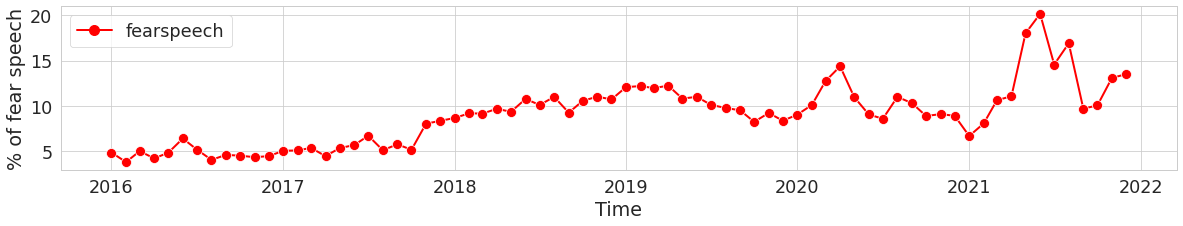

In [40]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 3)

sns.set(context='paper',style='whitegrid',font_scale=2.0, rc={"lines.linewidth": 2.0,"lines.markersize": 10})
sns.lineplot(data = df[["fearspeech"]],palette=['red'],markers=['o'])
plt.xlabel("Time")
plt.ylabel("% of fear speech")
path='../Results/fearspeech_temporal_twitter.pdf'
plt.savefig(path,bbox_inches='tight',dpi=400)
    

In [ ]:
df_final.loc[element['id']].iloc[0]

In [ ]:
df_final.loc[element['id']]['tweet_created_at']

In [41]:
dataframe=pd.DataFrame({'post': posts,
     'label': labels_all,
     'date': dates_all
    })

In [45]:
dataframe_sub=dataframe.dropna(axis=0)


for index,row in dataframe_sub[dataframe_sub['label']=='fear'].sample(1000).iterrows():
    if(('illegal' in row['post'].lower()) or ('immigrants' in row['post'].lower())) :
        pass
    else:
        print(row['post'])
        print("Label: ",row['label'])
        print(row['date'])
        print("-------------------------")
        

@DeeDub67 I would like to see equal application of law &amp; order; if news media, Dems, social media platforms had not encouraged 6 months of riots, looting, violence by BLM/Antifa groups, we wouldn't see this now. And lets not forget the anti-Trump hate speech 4 years ago at his inauguration
Label:  fear
9/1/2021
-------------------------
@clissold_jayne @kop44_ @SiPick @Billy7AVFC @CosmoKhan7 @GaryLineker Was their parents refugees from war torn countries that we are invading and bombing? Allow refugees to come here have children born here to be then indoctrinated to hate us and the west which leads to these attacks been committed?
Label:  fear
13/4/2018
-------------------------
@SenMikeLee Jewish white genocide plan. https://t.co/s1fbeiUwv8
Label:  fear
6/6/2019
-------------------------
#Richmond needs to wake up and change. Its slowly happening now with #BLM movement. Our city is a place of Hate and Corruption we actually need to take the steps forward into changing that. Addres

In [ ]:
dataframe_sub

In [ ]:
1st one annotated dataset in Gab 
2nd one closest in similarity in Twitter



In [ ]:
len(df_final)

In [ ]:
df_final = df_final[~df_final.index.duplicated(keep='first')]


In [ ]:
datetime.fromisoformat(df_final.loc[814280338465783808]['tweet_created_at'].iloc[0][:-1])

In [ ]:
df_final